# Basit Doğrusal Regresyon

### Model

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

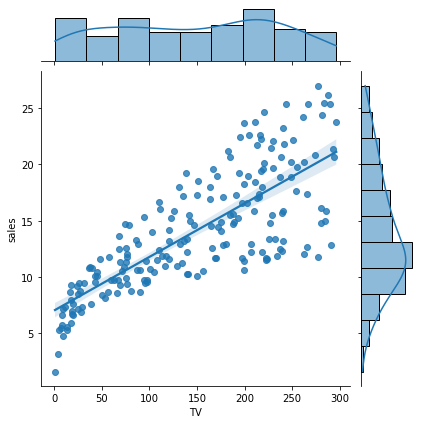

In [13]:
sns.jointplot(x="TV" , y="sales" , data=df , kind="reg" );

Tv artınca satışlarda doğrusal bir artış gözlemlenmekte.

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df[["TV"]] #bağımsız değişken

In [18]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [20]:
Y = df[["sales"]] #bağımlı değişken
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


![Title](SimpleLinearRegression.jpg)

![Title](örneklemModeli.png)

In [21]:
reg = LinearRegression()

In [22]:
model = reg.fit(X,Y)

In [23]:
model

LinearRegression()

In [24]:
str(model)

'LinearRegression()'

In [25]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [26]:
model.intercept_ #b0 katsayısı

array([7.03259355])

In [27]:
model.coef_ #b1 katsayısı

array([[0.04753664]])

In [28]:
#rkare
model.score(X,Y)

0.611875050850071

Bağımlı değişkendeki değişikliğin, bağımsız değişkenlerce açıklanma yüzdesidir.

Bu örnekte Satışlardaki değişikliğin %60'ı bağımsız değişkenlerce açıklanmaktadır. 

### Tahmin

(0.0, 28.27)

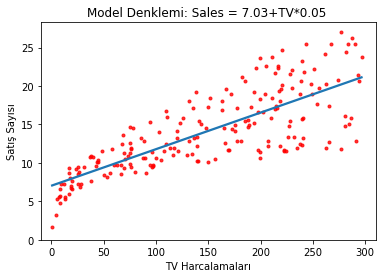

In [35]:
g= sns.regplot(df["TV"] , df["sales"] , ci=None, scatter_kws={'color':'r' , 's':9})
g.set_title("Model Denklemi: Sales = 7.03+TV*0.05 ")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcalamaları")
plt.xlim(-10,310) # x'i -10 ile 310 arasında yazdır
plt.ylim(bottom=0) #ynin başlangıç noktasını 0 yap

kırmızı noktalar gerçek değerler

mavi çizgi bulunmuş olan model denklemi

In [39]:
7.03+0.05*165 #165 tv satışıyla tahmin değeri hesaplama

15.280000000000001

In [40]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [38]:
model.predict([[165]])

array([[14.87613922]])

In [41]:
yeni_veri = [[5], [15], [30]]

In [42]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

 ### Artıklar ve Makine Öğrenmesindeki Önemi
 
 #### MSE: Hata Kareler Ortalaması
 
 #### RMSE:Hata Kareler Ortalamasının Karekökü

In [62]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [63]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [64]:
gercek_Y=Y[0:10]
gercek_Y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [65]:
tahmin_Y=pd.DataFrame(model.predict(X)[0:10])
tahmin_Y

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218
5,7.446162
6,9.765950
7,12.746498
8,7.441409
9,16.530414


In [66]:
hatalar = pd.concat([gercek_Y , tahmin_Y] , axis=1)
hatalar.columns = ["Gerçek Değerler" , "Tahmin Değerleri"]
hatalar

,Gerçek Değerler,Tahmin Değerleri
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [67]:
hatalar["Hata"] = hatalar["Gerçek Değerler"] - hatalar["Tahmin Değerleri"]

In [69]:
hatalar

,Gerçek Değerler,Tahmin Değerleri,Hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [70]:
hatalar["Hata Kareler"] = hatalar["Hata"] * hatalar["Hata"]
hatalar

,Gerçek Değerler,Tahmin Değerleri,Hata,Hata Kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [72]:
np.mean(hatalar["Hata Kareler"]) #ilk 10 değer için hata kareler ortalaması

9.290350329638105